# Wk2 Trk3 Day 1
<br>

# Exercises: Regression
---
<br>

#### CSAA2022
<br>

#### Getting to use sklearn

Many of the algorithms we are going to use over the course of this week have been efficiently implemented in sklearn. 
 
**Tasks** : 

1. Import the linear regression package and plot the regression line for the Olympics data
    * you may want to use numpy to read the data
    * generate some testing points with numpy, hint: what function do we use to generate equally spaced points of data
    * plot predictions and real data
    
    
2. In the lectures we have looked at polynomial order models
    * To make your lives easier, scale the x values: x = (x-1896)/4
    * You can do that with sklearn by using PolynomialFeatures
    * Experiment with different orders of the Polynomial
    * What happens? 
    * Compare those models with the standard order linear model we have tried
    

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
olympic = np.loadtxt("labData/olympic100m.txt", delimiter=",")

In [ ]:
olympic

In [4]:
model = LinearRegression()

In [5]:
#x = [2,]

In [6]:
X = olympic[:,0].reshape(-1,1)
y = olympic[:,1].reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=7)

In [8]:
model.fit(X_train, y_train)

LinearRegression()

In [9]:
print(f"Model coefficient is: {model.coef_},\nModel intercept: {model.intercept_} and \nModel score: {model.score(X_train,y_train)}")

Model coefficient is: [[-0.01416079]],
Model intercept: [38.08126605] and 
Model score: 0.81761114629318


In [10]:
model.coef_, model.intercept_

(array([[-0.01416079]]), array([38.08126605]))

In [11]:
model.score(X_train, y_train)

0.81761114629318

In [16]:
pred_y = model.predict(X_test)
pred_y

array([[11.11912478],
       [10.72262271],
       [11.17576794],
       [11.00583848],
       [10.15619117],
       [10.21283432]])

In [13]:
y_test

array([[11.  ],
       [10.3 ],
       [11.  ],
       [10.8 ],
       [10.14],
       [ 9.95]])

In [18]:
mean_squared_error(y_test, pred_y)

0.05590142408006987

In [12]:
model.predict([[1994]])

array([[9.84465382]])

In [16]:
print(y_test)

[[11.  ]
 [10.3 ]
 [11.  ]
 [10.8 ]
 [10.14]
 [ 9.95]]


In [55]:
pred_x = np.arange(1895, 2030, 4).reshape(-1,1)

In [56]:
pred_y = model.predict(pred_x)

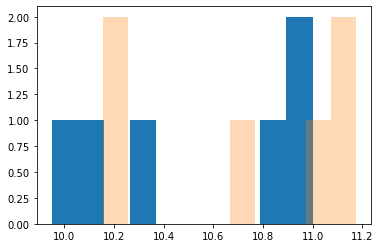

In [21]:
plt.hist(y_test)
plt.hist(pred_y, alpha=0.3)
plt.show();

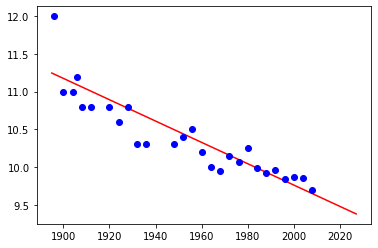

In [59]:
plt.plot(pred_x, pred_y, 'r')
plt.plot(X, y, 'bo')
plt.show();

In [65]:
model.predict([[2022]])

array([[9.44815174]])

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
print(X)
poly = PolynomialFeatures(3)
output = poly.fit_transform(X)
print(output)

In [173]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [156]:
X, y = datasets.load_diabetes(return_X_y = True, as_frame=True)

In [174]:
linearmodel = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [176]:
linearmodel.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [178]:
linearmodel.score(X_train, y_train)

0.5424677165685909

In [179]:
pred_y = linearmodel.predict(X_test)

In [ ]:
pred_y

In [181]:
y_test

169    152.0
35     102.0
37     276.0
21      49.0
310    109.0
       ...  
50     155.0
426    120.0
122    180.0
66     150.0
391     63.0
Name: target, Length: 89, dtype: float64

In [182]:
model_input = [0.04408, 0.051380, 0.019662, 0.057644, -0.005697, -0.002506, -0.026874, -0.002592, 0.032093, 0.007207]

In [183]:
linearmodel.predict([model_input])

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([193.5735379])

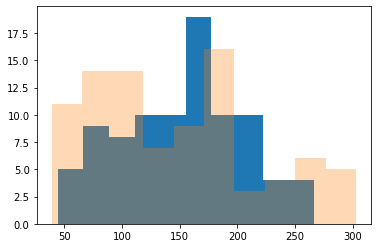

In [184]:
plt.hist(pred_y)
plt.hist(y_test, alpha=0.3);

In [17]:
from sklearn.metrics import mean_squared_error

In [186]:
error = mean_squared_error(y_test, pred_y)
error

3108.2050844877954

In [149]:
diabetes_poly = PolynomialFeatures(2)
output = diabetes_poly.fit_transform(X)
#print(output)

In [150]:
x_train, x_test, y_train, y_test = train_test_split(output, y, test_size=0.20, random_state=42)

In [151]:
polynomial = linearmodel.fit(x_train, y_train)

In [152]:
polynomial.score(x_train, y_train)

0.6061583502354679

In [153]:
y_pred = polynomial.predict(x_test)

In [154]:
mean_squared_error(y_test, y_pred)

3096.028307344274

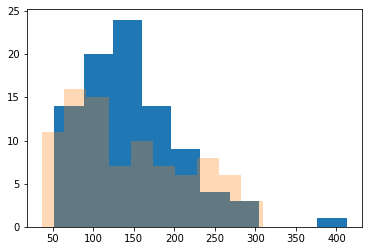

In [155]:
plt.hist(y_pred)
plt.hist(y_test, alpha=0.3);

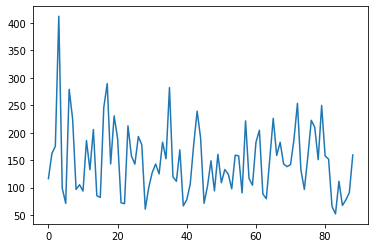

In [194]:
plt.plot(y_pred)
#plt.plot(y_test, alpha=0.3);

In [196]:
import pandas as pd
from sklearn.datasets import make_regression
# Generate fetures, outputs, and true coefficient of 100 samples
features, output, coef = make_regression(n_samples = 100,
                                         # three features
                                         n_features = 3,
                                         # two features are useful,
                                         n_informative = 2,
                                         # one target
                                         n_targets = 1,
                                         # 0.0 standard deviation
                                         noise = 0.0,
                                         # show the true coefficient 
                                         coef = True)